#### **TEM Workshop (24.07.25)**

This code is written for individuals working with Transmission Electron Microscopy (TEM) data.  
It aims to assist users in leveraging Python to handle TEM data by providing foundational Python skills and practical application exercises using TEM data.  
This notebook includes basic Python programming techniques and step-by-step examples to facilitate effective data analysis and visualization specific to TEM datasets.

---

Made by **Ingyu Yoo**  
Electron Microscopy and Spectroscopy Lab  
Seoul National University  

---

#### **Content**
1. List datatype
2. Numpy array datatype
3. Plot spectrum and image
4. For, If, While Statement
5. Function
6. Class
7. Load HAADF image
8. Post-Processing HAADF image
9. Apply Gaussian fitting to HAADF image
10. Get atomic column coordinates

---


In [1]:
!git clone https://github.com/yig0222/TEM_workshop.git

fatal: destination path 'TEM_workshop' already exists and is not an empty directory.


In [2]:
"""
Datatype1. List
"""
#Create list
tmp_list= []
tmp_list.append("a")
tmp_list.append("b")
tmp_list.append("c")

print(tmp_list)
print(len(tmp_list))

#Index
print("Index 0: ", tmp_list[0])
print("Index 1: ", tmp_list[1])
print("Index 2: ", tmp_list[2])
print("Index 0 to 1:", tmp_list[0:2])
print("application:", tmp_list[0:2][1])

['a', 'b', 'c']
3
Index 0:  a
Index 1:  b
Index 2:  c
Index 0 to 1: ['a', 'b']
application: b


In [3]:
#Application
tmp_list2 = []
tmp_list2.append(tmp_list)
tmp_list2.append(tmp_list)
print(len(tmp_list2))
print(tmp_list2[0])
print(tmp_list2[0][0:2][1])

2
['a', 'b', 'c']
b


In [4]:
"""
Datatype2. Array
"""
#Import Numpy and Pyplot Module
import numpy as np
import matplotlib.pyplot as plt

"""Create Numpy array"""
#Create numpy array template
arr1 = np.zeros((128,128), dtype="int8")
print("Arr1 : ", np.min(arr1),"to", np.max(arr1))

arr2 = np.ones((128,128), dtype="float32")
print("Arr2 : ", np.min(arr2),"to", np.max(arr2))

arr3 = np.random.random((128,128))
print("Arr3 : ", np.min(arr3),"to", np.max(arr3))

arr4 = np.random.randint(0,10, (128,128))
print("Arr3 : ", np.min(arr4),"to", np.max(arr4))

#Create numpy array manually
arr4 = np.array([[1.,2.],[3.,4.]]).astype("float32")
arr5 = np.array([[1.,2.],[3.,4.]]).astype(np.uint8)

print("Arr4 : ", arr4)
print("Arr4 shape:",arr4.shape, "| Arr4 dtype:", arr4.dtype)
print("Arr5 : ", arr5)
print("Arr5 shape:",arr5.shape, "| Arr5 dtype:", arr5.dtype)

Arr1 :  0 to 0
Arr2 :  1.0 to 1.0
Arr3 :  2.8058540264441767e-05 to 0.99995180972541
Arr3 :  0 to 9
Arr4 :  [[1. 2.]
 [3. 4.]]
Arr4 shape: (2, 2) | Arr4 dtype: float32
Arr5 :  [[1 2]
 [3 4]]
Arr5 shape: (2, 2) | Arr5 dtype: uint8


In [5]:
from numpy import *
tmp = zeros((128,128))
print(tmp.shape)

(128, 128)


In [6]:
"""Usage of numpy array"""
vector = np.array([2,3])
spectrum = np.array([1,2,3,4,5,6,7,8,9])
image = np.array([[1,2,3],[4,5,6],[7,8,9]])
spec_to_img = spectrum.reshape((3,3))
img_to_spec = image.flatten()
spec_to_2d = spectrum[np.newaxis,:]

print("2d vector shape: ", vector.shape)
print("spectrum shape: ", spectrum.shape)
print("image shape: ", image.shape)
print("")
print("spec_to_img shape: ", spec_to_img.shape)
print("img_to_spec shape: ", img_to_spec.shape)
print("2d vector shape: ", spec_to_2d.shape)

2d vector shape:  (2,)
spectrum shape:  (9,)
image shape:  (3, 3)

spec_to_img shape:  (3, 3)
img_to_spec shape:  (9,)
2d vector shape:  (1, 9)


In [7]:
"""Basic operations"""
vec1 = np.array([1,2,3])
vec2 = np.array([3,2,1])

list1 = [1,2,3]
list2 = [3,2,1]

mat_add = vec1+vec2
list_add = list1+list2
mat_concat = np.concatenate((vec1, vec2))

print("Array Add ", mat_add)
print("List Add ", list_add)
print("Array concat ", mat_concat)

Array Add  [4 4 4]
List Add  [1, 2, 3, 3, 2, 1]
Array concat  [1 2 3 3 2 1]


In [8]:
"""Index system in numpy array"""
tmp_arr = np.array([[1,2,3,4,5],[2,3,4,5,6],[3,4,5,6,7]])
print(tmp_arr)

print("[0,0]: ", tmp_arr[0,0])
print("[0,-1]: ", tmp_arr[0,-1])
print("[0]: ", tmp_arr[0])
print("[1,2:4]: ", tmp_arr[1,2:4])
print("[1:3,2:-1]: ", tmp_arr[1:3,2:-1])

[[1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]]
[0,0]:  1
[0,-1]:  5
[0]:  [1 2 3 4 5]
[1,2:4]:  [4 5]
[1:3,2:-1]:  [[4 5]
 [5 6]]


In [9]:
""" Sorting in numpy array
ex) np.where, np.arg"""
tmp_img = np.array([[1,2,3,4], [4,5,6,7], [7,8,9,10], [9,10,11,12]])
print("Original array")
print(tmp_img)
print("")

tmp_where = np.where(tmp_img<4, 1, 0)
tmp_argwhere = np.argwhere(tmp_img<4)

print("where result")
print(tmp_where)
print("")

print("argwhere result")
print(tmp_argwhere) #Original index
print("")

tmp_max = np.max(tmp_img)
tmp_argmax = np.argmax(tmp_img) #Flattened index
tmp_maxind = np.unravel_index(tmp_argmax, tmp_img.shape) #Original index

print("Max value:",tmp_max)
print("Argmax result:",tmp_argmax)
print("Max indices:",tmp_maxind)

Original array
[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 7  8  9 10]
 [ 9 10 11 12]]

where result
[[1 1 1 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]

argwhere result
[[0 0]
 [0 1]
 [0 2]]

Max value: 12
Argmax result: 15
Max indices: (3, 3)


#### For, If, While Statement
----

In [10]:
"""For Statement"""
#Usage of for statement
print("Original array")
print(tmp_img)

print("")
print("#1. Simplest For statement")
#range(4) : 0-3
for i in range(4):
    print(i)

print("")
print("#2 Usage of For statement")
for item in tmp_img:
    print("Original Result: ", item)

print("")
print("#3 Usage of Enumerate")
for count, item in enumerate(tmp_img):
    print("Result", count, ": ", item)

print("")
print("#4 Application")
for count, flat_item in enumerate(tmp_img.flatten()):
    print("Flat Result", count, ":", flat_item)

Original array
[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 7  8  9 10]
 [ 9 10 11 12]]

#1. Simplest For statement
0
1
2
3

#2 Usage of For statement
Original Result:  [1 2 3 4]
Original Result:  [4 5 6 7]
Original Result:  [ 7  8  9 10]
Original Result:  [ 9 10 11 12]

#3 Usage of Enumerate
Result 0 :  [1 2 3 4]
Result 1 :  [4 5 6 7]
Result 2 :  [ 7  8  9 10]
Result 3 :  [ 9 10 11 12]

#4 Application
Flat Result 0 : 1
Flat Result 1 : 2
Flat Result 2 : 3
Flat Result 3 : 4
Flat Result 4 : 4
Flat Result 5 : 5
Flat Result 6 : 6
Flat Result 7 : 7
Flat Result 8 : 7
Flat Result 9 : 8
Flat Result 10 : 9
Flat Result 11 : 10
Flat Result 12 : 9
Flat Result 13 : 10
Flat Result 14 : 11
Flat Result 15 : 12


In [11]:
"""Nested for loop (For statement in For statement)"""
for i in range(5):
    for j in range(5):
        print("i,j :", i,j)

i,j : 0 0
i,j : 0 1
i,j : 0 2
i,j : 0 3
i,j : 0 4
i,j : 1 0
i,j : 1 1
i,j : 1 2
i,j : 1 3
i,j : 1 4
i,j : 2 0
i,j : 2 1
i,j : 2 2
i,j : 2 3
i,j : 2 4
i,j : 3 0
i,j : 3 1
i,j : 3 2
i,j : 3 3
i,j : 3 4
i,j : 4 0
i,j : 4 1
i,j : 4 2
i,j : 4 3
i,j : 4 4


In [12]:
"""
Example of Nested For statement:
Scanning System in STEM
"""
STEM_image = np.zeros((256,256))
for i in range(STEM_image.shape[0]):
    for j in range(STEM_image.shape[1]):
        STEM_image[i,j] = np.random.randint(0,10)

#This code will be explained further
plt.figure()
plt.imshow(STEM_image)
plt.axis("off")
plt.show()

In [13]:
"""If statement"""
a=1
if a>3:
    print("Over three")
elif a==3:
    print("Three")
else:
    print("Less than three")

"""While statement"""
a=3
while a<10:
    print("a:",a)
    a= a+1

Less than three
a: 3
a: 4
a: 5
a: 6
a: 7
a: 8
a: 9


#### Using pyplot to Plot Spectrum and Image
----

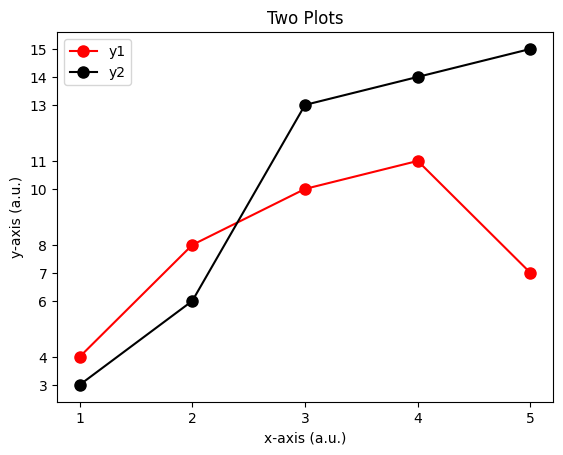

In [14]:
"""Show spectrum using pyplot"""
x = np.array([1,2,3,4,5])
y1 = np.array([4,8,10,11,7])
y2 = np.array([3,6,13,14,15])

plt.figure()
plt.plot(x,y1, color="red", marker='o', markersize=8, label="y1")
plt.plot(x,y2, color="black", marker='o', markersize=8, label="y2")
plt.title("Two Plots")
plt.xlabel("x-axis (a.u.)")
plt.ylabel("y-axis (a.u.)")
plt.xticks(x)  # Set the x-axis ticks to the numbers in the x array
plt.yticks(np.concatenate((y1, y2)))  # Set the y-axis ticks to the numbers in the y array
plt.legend() #y1,y2 legend mark
plt.show()

In [15]:
"""Show img using pyplot"""
tmp_img = np.array([[1,2,3,4], [4,5,6,7], [7,8,9,10], [9,10,11,12]])
print(tmp_img.shape, tmp_img.dtype)

plt.figure(figsize=(6,6))
plt.imshow(tmp_img, cmap="inferno") #colormap : gray, viridis, inferno, jet etc..
plt.title("Image")
plt.colorbar()
plt.axis("off")
plt.show()

(4, 4) int32


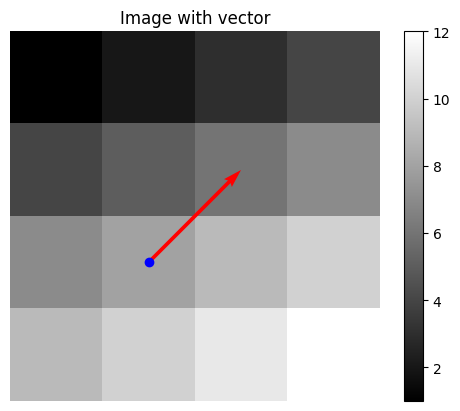

In [16]:
"""Plot vector in img"""
plt.figure()
plt.imshow(tmp_img, cmap="gray")
plt.colorbar()
plt.plot(1,2, 'bo')  # Mark the starting point with a blue circle, Note the axis definition
# (1,-1) vector starting at (1,2) -> Note the axis definition
plt.quiver(1, 2, 1, -1, angles='xy', scale_units='xy', scale=1, color='red', width=0.01) # X_pt,Y_pt, x_vec,y_vec order
plt.title("Image with vector")
plt.axis("off")

plt.show()

In [17]:
"""Making subplot to include multiple plot and image"""
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].plot()
ax[0].plot(x,y1, color="red", marker='o', markersize=8)
ax[0].plot(x,y2, color="black", marker='o', markersize=8)
ax[0].set_title("Two plots")
ax[0].set_xlabel("x-axis (a.u.)")
ax[0].set_ylabel("y-axis (a.u.)")
ax[0].set_xticks(x)
ax[0].set_yticks(np.concatenate((y1, y2)))

ax[1].imshow(tmp_img, cmap="inferno") #colormap : gray, viridis, inferno, jet etc..
ax[1].set_title("Image")
ax[1].axis("off")

ax[2].imshow(tmp_img, cmap="gray")
ax[2].plot(1,2, 'bo')  # Mark the starting point with a blue circle
ax[2].set_title("Image with  vector")
ax[2].quiver(1, 2, 1, -1, angles='xy', scale_units='xy', scale=1, color='red', width=0.01) # X_pt,Y_pt, x_vec,y_vec order
ax[2].axis("off")

plt.tight_layout()
plt.show()

<class 'numpy.ndarray'>
(2, 2)


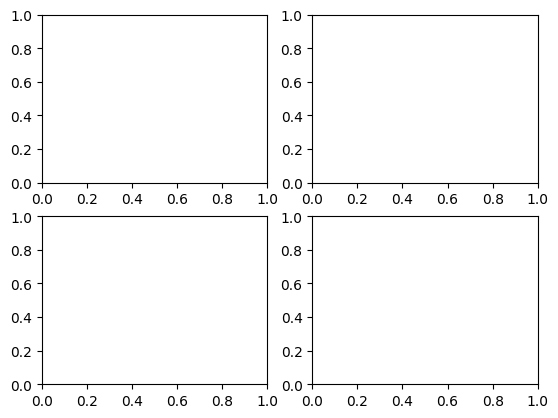

In [18]:
fig2, ax2 = plt.subplots(2,2)
print(type(ax2))
print(ax2.shape)

#### Combination of list and numpy
----

In [19]:
"""List datatype storing numpy arrays"""
list = []
arr1 = np.array([1,2,3])
arr2 = np.array([4,5,6])
arr3 = np.array([7,8,9])

list.append(arr1)
list.append(arr2)
list.append(arr3)

print("Number of items in list:", len(list))
print("All items in list")
print(list)
print("")

spec_stack = np.asarray(list)
print("Shape of numpy spectrum stack:", spec_stack.shape)
print("Numpy Spectrum Stack")
print(spec_stack)

Number of items in list: 3
All items in list
[array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]

Shape of numpy spectrum stack: (3, 3)
Numpy Spectrum Stack
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [20]:
"""List datatype storing multiple numpy images"""
list = []
img1 = np.random.randint(0,10, (4,4))
img2 = np.random.randint(0,10, (4,4))
img3 = np.random.randint(0,10, (4,4))

#img1 = np.array([[1,2,3,4], [4,5,6,7], [7,8,9,10], [10,11,12,13]])
#img2 = np.array([[2,0,4,1], [1,5,6,7], [8,5,3,2], [2,5,7,8])
#img3 = np.array([[3,4,8,4], [9,,3,3,8], [9,10,7,1],[3,6,9,1])

list.append(img1)
list.append(img2)
list.append(img3)

print("Number of items in list:", len(list))
print("All items in list")
print(list)
 
img_stack = np.asarray(list)
print("")
print("Shape of numpy image stack:", img_stack.shape)
print("Numpy Image Stack")
print(img_stack)

Number of items in list: 3
All items in list
[array([[1, 7, 1, 9],
       [0, 0, 3, 2],
       [6, 9, 6, 9],
       [2, 4, 2, 9]]), array([[5, 9, 1, 1],
       [5, 4, 7, 7],
       [8, 8, 7, 9],
       [7, 8, 5, 9]]), array([[2, 0, 2, 1],
       [2, 8, 1, 7],
       [1, 2, 4, 2],
       [7, 1, 7, 0]])]

Shape of numpy image stack: (3, 4, 4)
Numpy Image Stack
[[[1 7 1 9]
  [0 0 3 2]
  [6 9 6 9]
  [2 4 2 9]]

 [[5 9 1 1]
  [5 4 7 7]
  [8 8 7 9]
  [7 8 5 9]]

 [[2 0 2 1]
  [2 8 1 7]
  [1 2 4 2]
  [7 1 7 0]]]


In [21]:
list_stack = img_stack.tolist()
print("Numpy array to list :", type(list_stack))
print(len(list_stack))
print("List index 0:", list_stack[0])
print("Numpy index 0:", img_stack[0])

Numpy array to list : <class 'list'>
3
List index 0: [[1, 7, 1, 9], [0, 0, 3, 2], [6, 9, 6, 9], [2, 4, 2, 9]]
Numpy index 0: [[1 7 1 9]
 [0 0 3 2]
 [6 9 6 9]
 [2 4 2 9]]


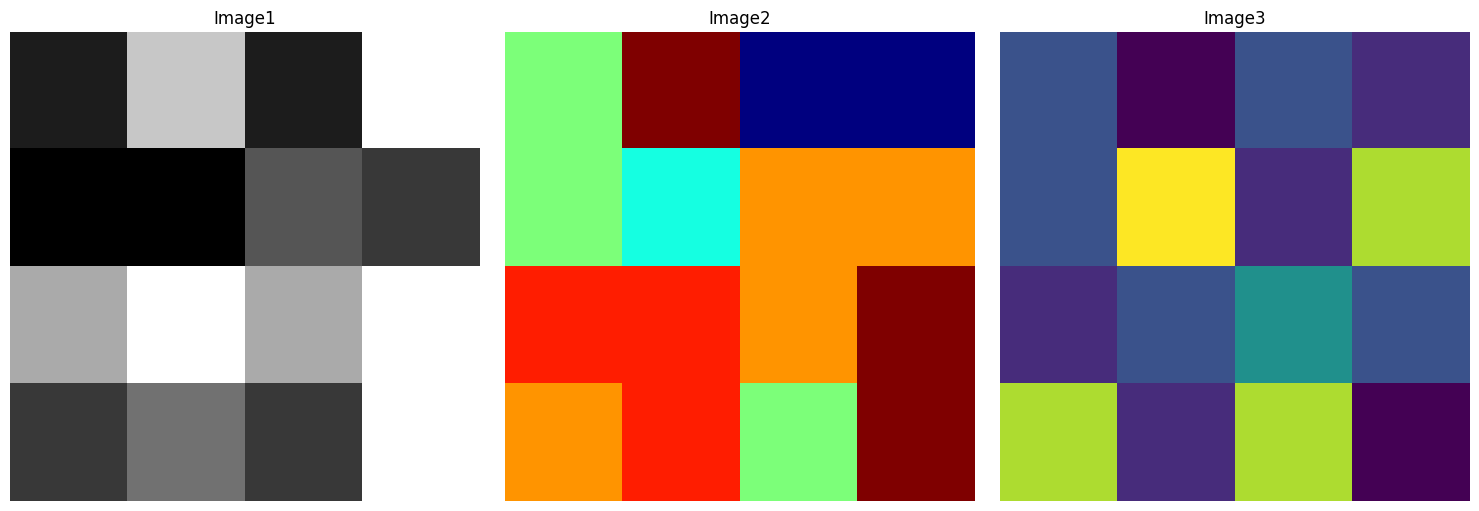

In [22]:
"""Combination of For statement and pyplot subplots"""
#Plot all images in numpy image stack
num_img = img_stack.shape[0]
colormap = ["gray", "jet", "viridis"]
fig, ax = plt.subplots(1, num_img, figsize=(5*num_img, 5))

for i,img in enumerate(img_stack):
    ax[i].imshow(img, cmap=colormap[i])
    ax[i].axis("off")
    ax[i].set_title("Image"+ str(i+1))

plt.tight_layout()
plt.show()

#### Functions and Class
----

In [23]:
def operation(number):
    return 2*number+1

input = 5
output = operation(input)
print("Input:",input,"Output", output)

Input: 5 Output 11


In [24]:
"""Translate previous code to definition"""

list = []
img1 = np.array([[1,2,3], [4,5,6], [7,8,9]])
img2 = np.array([[2,0,4], [5,6,7], [8,5,3]])
img3 = np.array([[3,4,8], [9,3,8], [9,10,7]])

list.append(img1)
list.append(img2)
list.append(img3)
img_stack = np.asarray(list)

print("Result (Not using Function):")
print("Stack Shape: ", img_stack.shape)

def list_to_array(one, two, three):
    list = []

    list.append(one)
    list.append(two)
    list.append(three)

    img_stack = np.asarray(list)
    print("Stack Shape: ", img_stack.shape)

    return img_stack

print("Result (Using Function)")
img_stack_tmp = list_to_array(img1,img2,img3)

Result (Not using Function):
Stack Shape:  (3, 3, 3)
Result (Using Function)
Stack Shape:  (3, 3, 3)


In [25]:
""" Applications of creating Function"""
def list_to_array(img1, img2, img3):
    list = []

    list.append(img1)
    list.append(img2)
    list.append(img3)

    img_stack = np.asarray(list)
    print("Stack Shape: ", img_stack.shape)

    return img_stack

#Note usage of positional argument and if statement
def display_image(title, image, axis=False):
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap='gray')
    if not axis:
        plt.axis('off')
    plt.show()

Result of List_to_array Function
Stack Shape:  (3, 3, 3)

Result of display_image Function


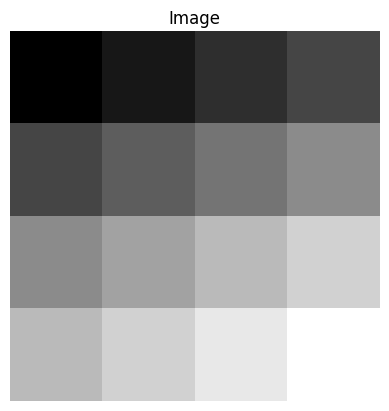

In [26]:
"""Execute Functions"""
print("Result of List_to_array Function")
img_stack_tmp = list_to_array(img1,img2,img3)
print("")
print("Result of display_image Function")
display_image("Image", tmp_img)

In [27]:
"""How to define Class"""
class ArrayProcessor:
    def __init__(self, array):
        #Attribute
        self.array = array
        self.array_sorted = self.sort_array()
        self.maxind = self.find_max_index()

    #Method
    def show_image(self, cmap='viridis'):
        plt.figure()
        plt.imshow(self.array, cmap=cmap)
        plt.colorbar()
        plt.title("Original Image")
        plt.show()

    def sort_array(self):
        return np.sort(self.array, axis=None).reshape(self.array.shape)

    def find_max_index(self):
        max_value = np.max(self.array)
        max_indices = np.where(self.array == max_value)
        return np.array(max_indices).reshape(2)

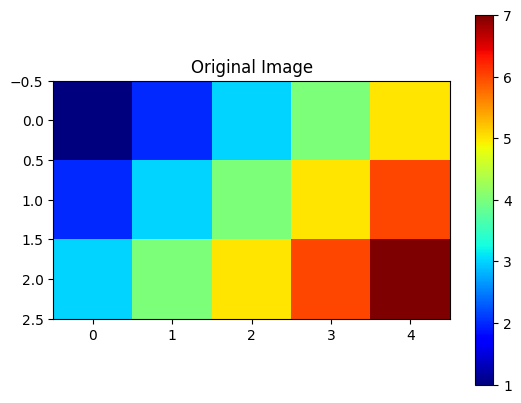


Indices of the maximum value:
[2 4]


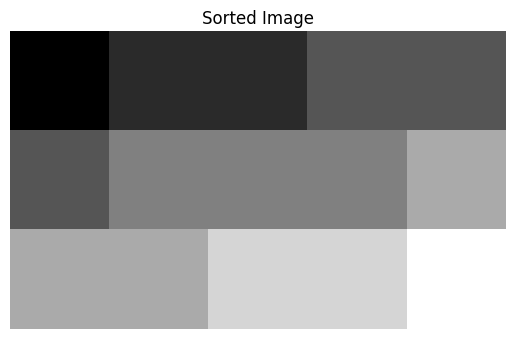

In [28]:
"""How to use defined Class"""
# Sample 2D numpy array
tmp_arr = np.array([[1,2,3,4,5],[2,3,4,5,6],[3,4,5,6,7]])
# Create an instance of ArrayProcessor
processor = ArrayProcessor(tmp_arr)

# Show the image of the array
processor.show_image(cmap="jet") #can change cmap

# Print the maximum value indices
print("")
print("Indices of the maximum value:")
print(processor.maxind)

# Get the argsorted array
sorted_array = processor.sort_array()
display_image("Sorted Image", sorted_array)

In [29]:
type(processor)

__main__.ArrayProcessor

### Application to HAADF image
----

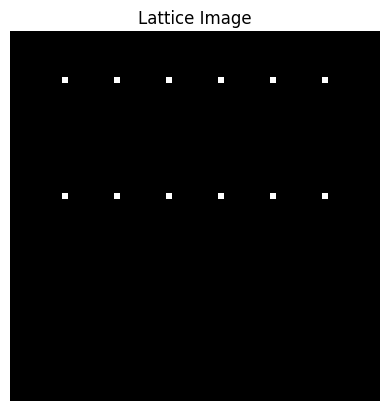

In [30]:
"""Create Image Manually"""

lattice_img = np.zeros((64,64))
pts = np.array([[8,9], [8,18], [8,27], [8,36], [8,45], [8,54],
               [28,9], [28,18], [28,27], [28,36], [28,45], [28,54]])
for pt in pts:
    lattice_img[pt[0], pt[1]] = 1

display_image("Lattice Image", lattice_img)

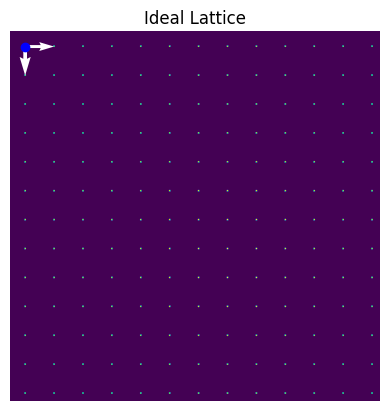

In [31]:
""" How to make atomic image manually """
"""
Parameters to define lattice
1) Start Point
2) Y_basis, X_basis vectors
3) Gaussian Template (Gaussian Parameters and Size of Gaussian Template)
4) Number of atomic columns (tile_y, tile_x)
5) Image Shape
"""

lattice_img = np.zeros((256,256))
start = np.array([10,10])
y_basis = np.array([0,20]) #Change according to crystal structure
x_basis = np.array([20,0]) #Change according to crystal structure

tile_y = 30
tile_x = 30

for y in range(tile_y):
    for x in range(tile_x):
        coord = start + y*y_basis + x*x_basis
        if coord[0]<lattice_img.shape[0] and coord[1]<lattice_img.shape[1]:
            lattice_img[coord[0], coord[1]] = 1

plt.figure()
plt.imshow(lattice_img)
plt.plot(start[1], start[0], "bo")
plt.title("Ideal Lattice")
plt.quiver(start[1], start[0], y_basis[1], y_basis[0], angles='xy', scale_units='xy', scale=1, color='w', width=0.008) # X_pt,Y_pt, x_vec,y_vec order
plt.quiver(start[1], start[0], x_basis[1], x_basis[0], angles='xy', scale_units='xy', scale=1, color='w', width=0.01) # X_pt,Y_pt, x_vec,y_vec order
plt.axis("Off")
plt.show()

In [32]:
"""Create numpy array using Gaussian Function"""
def gaussian_kernel(size, A, sigma=1):
    """Creates a 2D Gaussian kernel."""
    x, y = np.meshgrid(np.linspace(-size//2, size//2+1, size), np.linspace(-size//2, size//2+1, size)) #Make x,y coordinates (meshgrid)
    kernel = A*np.exp(-(x**2 + y**2) / (2 * sigma**2)) #2D Gaussian Function
    return kernel

"""Example of creating Gaussian Template"""
size, amplitude, sig = 9, 5, 2
gaussian_template = gaussian_kernel(size, amplitude, sigma=sig)
display_image("Gaussian template", gaussian_template)

In [33]:
"""Overlay gaussian template into specific coordinate"""
atomic_img = np.zeros((256,256))

pos = np.array([64,64])
atomic_img[pos[0]-size//2: pos[0]+size//2+1, pos[1]-size//2:pos[1]+size//2+1] = gaussian_template
display_image("Overlaid gaussian template to one atomic column", atomic_img)

In [34]:
"""Function to generate lattice image based on parameters"""
def generate_lattice_image(start, y_basis, x_basis, gaussian_template, tile_y, tile_x, size, shape=(512,512)):
    lattice_img = np.zeros(shape)

    for y in range(tile_y):
        for x in range(tile_x):
            coord = start + y * y_basis + x * x_basis #Coordinate of each atomic column
            coord = coord.astype(int)  # Ensure coord is integer
            if coord[0] + size // 2 + 1 < lattice_img.shape[0] and coord[1] + size // 2 + 1 < lattice_img.shape[1]:
                lattice_img[coord[0] - size // 2: coord[0] + size // 2 + 1, coord[1] - size // 2: coord[1] + size // 2 + 1] = gaussian_template

    return lattice_img

In [35]:
"""Example of generating lattice image"""
start = np.array([10,10])
y_basis = np.array([0,20]) #Change according to crystal structure
x_basis = np.array([20, 0]) #Change according to crystal structure
tile_y = 30
tile_x = 60
size=9
gaussian_template = gaussian_kernel(9, 5, 2) #Change according to atom element

lattice_img =  generate_lattice_image(start, y_basis, x_basis, gaussian_template, tile_y, tile_x, size, shape=(256,256))
display_image("Lattice Image", lattice_img)

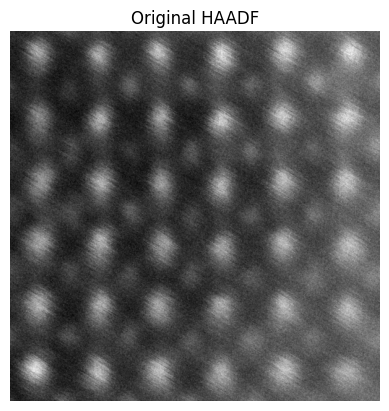

In [36]:
"""Load Experimental Image"""

import tifffile #Import tifffile to load tif file
img_adr = "TEM_workshop/data/atomic_image.tiff"
HAADF = tifffile.imread(img_adr)
display_image("Original HAADF", HAADF)

In [37]:
"""Filtering original image"""
import cv2
HAADF_uint8 = cv2.normalize(HAADF, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8) #Change datatype into uint8 for filtering
# Set Parameters for filtering
custom_kernel = gaussian_kernel(5, 0.1, sigma=3) #As a example
print("Kernel")
print(custom_kernel)
print("")

# Apply Custom Filter
filtered_HAADF = cv2.filter2D(HAADF_uint8, -1, custom_kernel)
display_image("Original Image", HAADF_uint8)
display_image("Filtered Image", filtered_HAADF)

Kernel
[[0.03678794 0.05352614 0.06065307 0.05352614 0.03678794]
 [0.05352614 0.07788008 0.08824969 0.07788008 0.05352614]
 [0.06065307 0.08824969 0.1        0.08824969 0.06065307]
 [0.05352614 0.07788008 0.08824969 0.07788008 0.05352614]
 [0.03678794 0.05352614 0.06065307 0.05352614 0.03678794]]



In [38]:
"""
Apply Various Filtering Method
Check https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html for detailed explanation
"""
#Setup (Match datatype)
image, image_uint8 = HAADF, HAADF_uint8
image_uint8 = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8) #Change datatype into uint8 for filtering

# Apply Gaussian Filter
gaussian_ksize = (5, 5)  # Kernel size (Should be odd number)
gaussian_sigma = 3  # Standard deviation in X and Y direction
gaussian_blur = cv2.GaussianBlur(image_uint8, gaussian_ksize, gaussian_sigma)

# Apply Median Filter
median_ksize = 5  # Aperture linear size; it must be odd and greater than 1
median_blur = cv2.medianBlur(image_uint8, median_ksize)

# Apply Bilateral Filter
bilateral_d = 9  # Diameter of each pixel neighborhood
bilateral_sigmaColor = 75  # Filter sigma in the color space
bilateral_sigmaSpace = 75  # Filter sigma in the coordinate space
bilateral_filter = cv2.bilateralFilter(image_uint8, bilateral_d, bilateral_sigmaColor, bilateral_sigmaSpace)

# Apply Sharpening
sharpening_kernel = np.array([[0, -1, 0], [-1, 6,-1], [0, -1, 0]])
sharpened = cv2.filter2D(image_uint8, -1, sharpening_kernel)

# Apply Histogram Equalization
hist_eq = cv2.equalizeHist(image_uint8)

# Apply CLAHE
clahe_clipLimit = 2.0  # Threshold for contrast limiting
clahe_tileGridSize = (8, 8)  # Size of grid for histogram equalization
clahe = cv2.createCLAHE(clipLimit=clahe_clipLimit, tileGridSize=clahe_tileGridSize)
clahe_image = clahe.apply(image_uint8)

#Plot all filtered images
img_concat = np.concatenate([image_uint8, gaussian_blur, median_blur, bilateral_filter, sharpened, hist_eq, clahe_image], axis=1)
print(img_concat.shape)
print("Original Image | Filtered Image order of Gaussian filter, Median_filter, Bilateral_filter, Sharpening_filter, Histogram_equalization, Clahe")
plt.figure(figsize=(36,6))
plt.imshow(img_concat, cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()

(512, 3584)
Original Image | Filtered Image order of Gaussian filter, Median_filter, Bilateral_filter, Sharpening_filter, Histogram_equalization, Clahe


In [39]:
#Save numpy array data (Optional)
file_adr = "C:/Users/user/Downloads/output.tiff"
tifffile.imwrite(file_adr, img_concat)

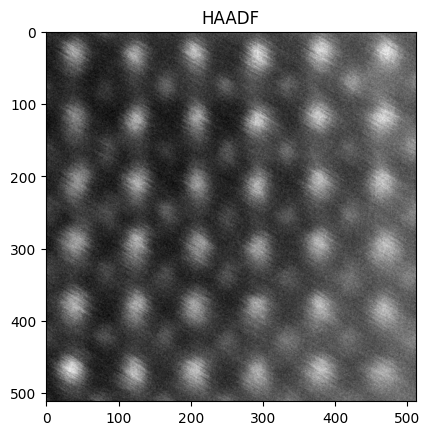

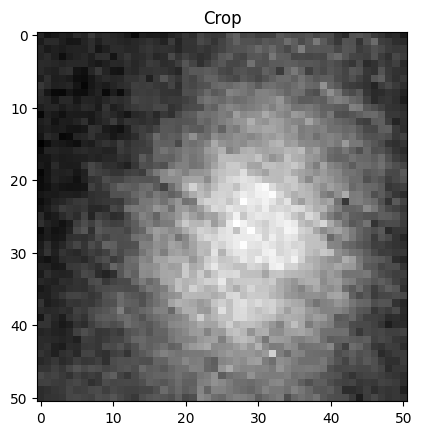

In [40]:
"""Crop Region of Interest"""

display_image("HAADF", HAADF, axis=True)

atom_center = [120,120]
crop_size = 51 #Should be odd number
crop = HAADF[atom_center[0]-crop_size//2:atom_center[0]+crop_size//2+1, atom_center[1]-crop_size//2:atom_center[1]+crop_size//2+1]

display_image("Crop", crop, axis=True)

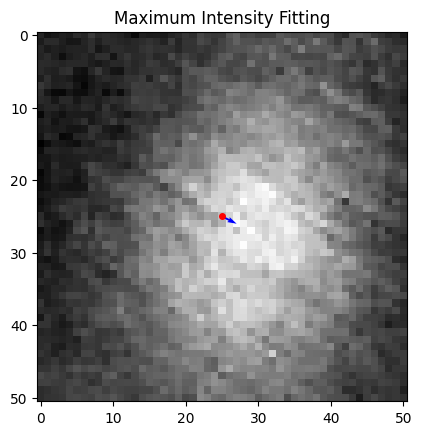

In [41]:
"""How to find center of atomic column?
1) Maximum Intensity of atomic column
2) Gaussian fitting
"""

"""1) Maximum Intensity of atomic column"""
crop_argmax = np.argmax(crop) #Flattened index
crop_maxind = np.unravel_index(crop_argmax, crop.shape) #Original index

plt.figure()
plt.imshow(crop, cmap="gray")
plt.title("Maximum Intensity Fitting")
plt.plot(crop_size//2, crop_size//2, "ro", markersize=4)
plt.quiver(crop_size//2, crop_size//2, crop_maxind[1]-crop_size//2, crop_maxind[0]-crop_size//2, angles='xy', scale_units='xy', scale=1, color='b', width=0.005)
plt.show()

In [42]:
"""
2) Gaussian Fitting
Convert Gaussian Kernel function to Gaussian Fitting function
"""
from scipy.optimize import curve_fit #Import curve_fit for guassian fitting

def gaussian_2d(xy, amplitude, xo, yo, sigma):
    x = xy[0]
    y = xy[1]
    xo = float(xo)
    yo = float(yo)
    g = amplitude * np.exp(-(((x-xo)**2)/(2*sigma**2) + ((y-yo)**2)/(2*sigma**2)))
    return g.ravel()

def gaussian_fitting(crop):
    data = crop.flatten()
    y_,x_ = crop.shape
    y = np.linspace(0, y_-1, y_) #y_grid
    x = np.linspace(0, x_-1, x_) #x_grid
    x,y = np.meshgrid(x,y) #convert to meshgrid

    initial_guess = [np.max(crop), int(x_/2), int(y_/2), 0.5]
    popt, pcov = curve_fit(gaussian_2d, np.array([x, y]), data, p0=initial_guess)
    amplitude, center_x, center_y, sigma = popt

    return amplitude, int(np.round(center_x)), int(np.round(center_y)), sigma

In [43]:
"""Using Gaussian Fitting to get refined atomic center"""
amplitude, center_x, center_y, sigma = gaussian_fitting(crop)
print("Gaussian Fitting Result")
print("amplitude, center_x, center_y, sigma")
print(amplitude, center_x, center_y, sigma)

plt.figure()
plt.imshow(crop, cmap="gray")
plt.title("Gaussian Fitting")
plt.plot(crop_size//2, crop_size//2, "ro", markersize=4)
plt.quiver(crop_size//2, crop_size//2, center_x-crop_size//2, center_y-crop_size//2, angles='xy', scale_units='xy', scale=1, color='b', width=0.005)
plt.show()

Gaussian Fitting Result
amplitude, center_x, center_y, sigma
37099.23687249439 29 28 31.601625067795112


In [44]:
"""Make function for refining center"""
def atom_center_fitting(img, initial_guess, crop_size):
    assert crop_size %2 !=0, "Crop_size should be odd number"
    crop = img[initial_guess[0]-crop_size//2:initial_guess[0]+crop_size//2+1, initial_guess[1]-crop_size//2:initial_guess[1]+crop_size//2+1]
    _, center_x, center_y, _ = gaussian_fitting(crop)
    refined_center = np.array(initial_guess)+np.array([center_y-crop_size//2, center_x-crop_size//2])
    return refined_center

def atom_center_fitting_2(img, initial_guess, crop_size):
    assert crop_size %2 !=0, "Crop_size should be odd number"
    crop = img[initial_guess[0]-crop_size//2:initial_guess[0]+crop_size//2+1, initial_guess[1]-crop_size//2:initial_guess[1]+crop_size//2+1]
    center_y, center_x = np.unravel_index(np.argmax(crop), crop.shape)
    refined_center = np.array(initial_guess)+np.array([center_y-crop_size//2, center_x-crop_size//2])
    return refined_center


"""Example of atom_center_fitting function"""
initial_guess = [30,30]
crop_size = 51 #Should be odd number
tmp_refined_center = atom_center_fitting(HAADF, initial_guess, crop_size) #Gaussian Peak as center
tmp_refined_center2 = atom_center_fitting_2(HAADF, initial_guess, crop_size) #Maximum Intensity as center


print("Initial guess:", initial_guess)
print("Gaussian fitting refined center:", tmp_refined_center)
print("Max intensity refined center:", tmp_refined_center2)

Initial guess: [30, 30]
Gaussian fitting refined center: [30 40]
Max intensity refined center: [30 36]


9.278091320974279e-16 4.0


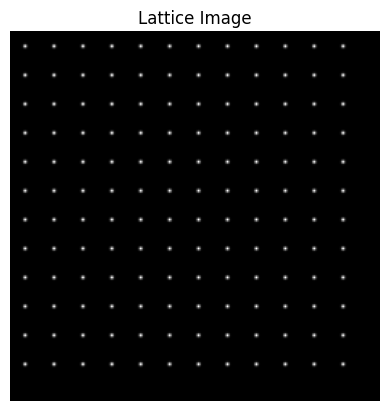

In [45]:
"""Recap previous Generate Lattice Image Part"""
"""Step1. Know image shape, tile_y, tile_x as a Prior Knowledge"""
"""Step2. Need start point, y_basis vector, x_basis vector, crop_size, gaussian template for lattice generation"""

size=11
gaussian_template = gaussian_kernel(size, 4, 1)
print(np.min(gaussian_template), np.max(gaussian_template))
start = np.array([10,10])
y_basis = np.array([0,20]) #Change according to crystal structure
x_basis = np.array([20, 0]) #Change according to crystal structure
tile_y = 30
tile_x = 60

lattice_img =  generate_lattice_image(start, y_basis, x_basis, gaussian_template, tile_y, tile_x, size, shape=(256,256))
display_image("Lattice Image", lattice_img)

In [46]:
"""
Apply lattice generation function to Experimental HAADF Image
Do Initial Guess by looking at the original HAADF image
"""
plt.figure(figsize=(8,8))
plt.imshow(HAADF, cmap='gray')
plt.title("Original HAADF")
plt.gca().set_xticks(np.arange(0, HAADF.shape[1], 30))  # step size of x axis
plt.gca().set_yticks(np.arange(0, HAADF.shape[0], 30))  # step size of y axis
plt.show()

Find Starting Position
Initial guess: [30, 30]
Refined center: [30 40]

Find first eigenvector
Initial guess: [120, 40]
Refined center: [120  40]
y_basis vector: [90  0]

Find second eigenvector
Initial guess: [30, 120]
Refined center: [ 32 123]
x_basis vector: [ 2 83]



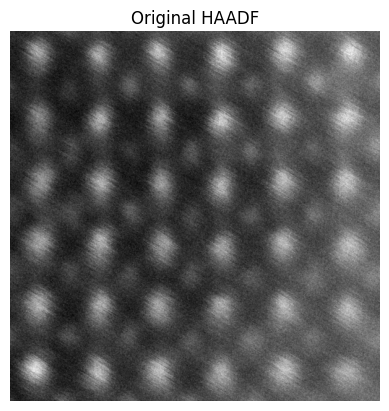

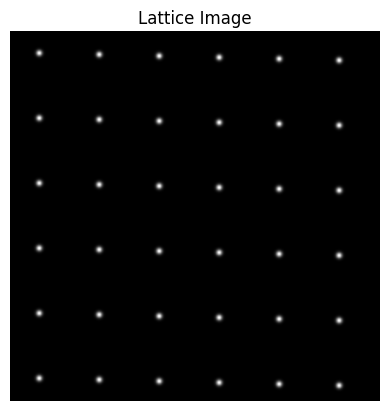

In [47]:
"""Generate images with only the Bright Columns"""

"""Step1. Know image shape, tile_y, tile_x as a Prior Knowledge"""
shape = HAADF.shape
tile_y1 = 6
tile_x1 = 6

"""Step2. Find start point, y_basis vector, x_basis vector for lattice generation"""

"""Crop_size (Size of Atomic column)"""
crop_size1 = 41 #Should be odd number

"""Start Point"""
start_center1 = [30,30]
fitted_start_center1 = atom_center_fitting(HAADF, start_center1, crop_size1)

print("Find Starting Position")
print("Initial guess:", start_center1)
print("Refined center:", fitted_start_center1)
print("")

"""Y_basis vector (Find second point positions to get Y_basis)"""
second_center1 = [120,40]
fitted_second_center1 = atom_center_fitting(HAADF, second_center1, crop_size1)
print("Find first eigenvector")
print("Initial guess:", second_center1)
print("Refined center:", fitted_second_center1)

y_basis1 = fitted_second_center1-fitted_start_center1
print("y_basis vector:", y_basis1)
print("")

"""X_basis vector ((Find third point positions to get X_basis)"""
print("Find second eigenvector")
third_center1 = [30,120]
fitted_third_center1 = atom_center_fitting(HAADF, third_center1, crop_size1)
print("Initial guess:", third_center1)
print("Refined center:", fitted_third_center1)

x_basis1 = fitted_third_center1-fitted_start_center1
print("x_basis vector:", x_basis1)
print("")

"""Gaussian Template"""
gaussian_template1 = gaussian_kernel(crop_size1, 20, 3) #Arbitary numbers

"""Use all parameters to generate lattice of bright columns"""
lattice1 = generate_lattice_image(fitted_start_center1,y_basis1, x_basis1, gaussian_template1, tile_y1, tile_x1, crop_size1, shape)

display_image("Original HAADF", HAADF)
display_image("Lattice Image", lattice1)

In [48]:
"""Generate images with only the Dark Columns"""
#Set number of tiling
tile_y2 = 5
tile_x2 = 5

#Atomic size of dark columns
crop_size2 = 31

#Get starting position
start_center2 = [80,80]
fitted_start_center2 = atom_center_fitting(HAADF, start_center2, crop_size2)
print("Find Starting Position")
print("Start Center:", start_center2)
print("Fitted center:", fitted_start_center2)
print("")

#Use same basis with lattice1
y_basis2 = np.array([90, 0])
print("First eigenvector:", y_basis2)
x_basis2 = np.array([2, 83])
print("Second eigenvector:", x_basis2)
print("")

#Generate Gaussian template
gaussian_template2 = gaussian_kernel(crop_size2, 10, 5) #Arbitary numbers

#Use all parameters to generate lattice of dark columns
lattice2 = generate_lattice_image(fitted_start_center2,y_basis2, x_basis2, gaussian_template2, tile_y2, tile_x2, crop_size2, shape)
display_image("Lattice Image", lattice2)

Find Starting Position
Start Center: [80, 80]
Fitted center: [81 82]

First eigenvector: [90  0]
Second eigenvector: [ 2 83]



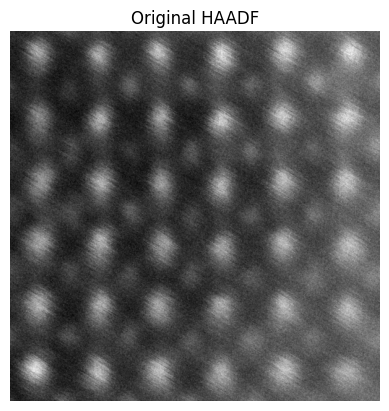

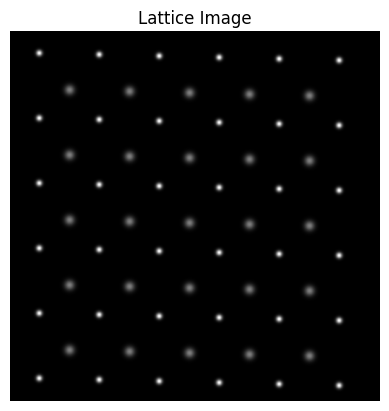

In [49]:
"""Generating final lattice"""
lattice = lattice1+lattice2 #Including bright columns and dark columns
display_image("Original HAADF", HAADF)
display_image("Lattice Image", lattice)

In [50]:
"""Get all  positions of atomic columns"""
#Positions of Bright Columns
bright_coord = []
for y in range(6):
    for x in range(6):
        coord1 = fitted_start_center1+y*y_basis1+x*x_basis1
        bright_coord.append(coord1)

#Positions of Dark Columns
dark_coord = []
for y in range(5):
    for x in range(5):
        coord2 = fitted_start_center2+y*y_basis2+x*x_basis2
        dark_coord.append(coord2)

print("Number of Bright columns:", len(bright_coord))
print("Number of Dark columns:", len(dark_coord))
print("")

#To print out all positions
print("Coordinates of Bright Columns")
print(bright_coord)
print("")

print("Coordinates of Dark Columns")
print(dark_coord)
print("")

Number of Bright columns: 36
Number of Dark columns: 25

Coordinates of Bright Columns
[array([30, 40]), array([ 32, 123]), array([ 34, 206]), array([ 36, 289]), array([ 38, 372]), array([ 40, 455]), array([120,  40]), array([122, 123]), array([124, 206]), array([126, 289]), array([128, 372]), array([130, 455]), array([210,  40]), array([212, 123]), array([214, 206]), array([216, 289]), array([218, 372]), array([220, 455]), array([300,  40]), array([302, 123]), array([304, 206]), array([306, 289]), array([308, 372]), array([310, 455]), array([390,  40]), array([392, 123]), array([394, 206]), array([396, 289]), array([398, 372]), array([400, 455]), array([480,  40]), array([482, 123]), array([484, 206]), array([486, 289]), array([488, 372]), array([490, 455])]

Coordinates of Dark Columns
[array([81, 82]), array([ 83, 165]), array([ 85, 248]), array([ 87, 331]), array([ 89, 414]), array([171,  82]), array([173, 165]), array([175, 248]), array([177, 331]), array([179, 414]), array([261, 

In [51]:
#Save coordinate file (Optional)
save_folder = "C:/Users/user/Downloads/" #Edit save_folder directory
bright_array = np.asarray(bright_coord).astype(np.uint8)
dark_array = np.asarray(dark_coord).astype(np.uint8)

np.savetxt(save_folder+"bright_coord.csv", bright_array, delimiter = ",")
np.savetxt(save_folder+"dark_coord.csv", dark_array, delimiter = ",")